INITIALIZATION

In [21]:
import ee
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import requests
from google.oauth2 import service_account

# Initialize Earth Engine API
service_account_key = r'C:\Users\serafino\Desktop\Water Management System\ee-eugenioserafino01-dca7dda5348b.json'
api_key_openweathermap = '43d7716149175723f1c5277d441a8eb0'
scopes = ['https://www.googleapis.com/auth/earthengine']
credentials = service_account.Credentials.from_service_account_file(
    service_account_key, scopes=scopes
)
ee.Initialize(credentials=credentials)

# data file info on soil moisture and soil properties
data_files_info = [
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Villevielle\SMOSMANIA_SMOSMANIA_Villevielle_sm_0.300000_0.300000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.79512140110056, 4.089885950088502],
            [43.79512140110056, 4.090958833694459],
            [43.79634498472339, 4.089885950088502],
            [43.79634498472339, 4.090958833694459],
        ], # Villevielle
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Villevielle\SMOSMANIA_SMOSMANIA_Villevielle_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Urgons\SMOSMANIA_SMOSMANIA_Urgons_sm_0.300000_0.300000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.63965465032482, -0.4351079463958741],
            [43.63965465032482, -0.43407797813415533],
            [43.640299091949935, -0.4351079463958741],
            [43.640299091949935, -0.43407797813415533],
        ], # Urgons
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Urgons\SMOSMANIA_SMOSMANIA_Urgons_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Savenes\SMOSMANIA_SMOSMANIA_Savenes_sm_0.300000_0.300000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.82578087836081, 1.1749470233917239],
            [43.82578087836081, 1.1771786212921145],
            [43.82712767623998, 1.1749470233917239],
            [43.82712767623998, 1.1771786212921145],
        ], # Savenes 1
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Savenes\SMOSMANIA_SMOSMANIA_Savenes_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Savenes\SMOSMANIA_SMOSMANIA_Savenes_sm_0.300000_0.300000_ThetaProbe-ML3_20171101_20241110.stm',
        'coordinates': [
            [43.82578087836081, 1.1749470233917239],
            [43.82578087836081, 1.1771786212921145],
            [43.82712767623998, 1.1749470233917239],
            [43.82712767623998, 1.1771786212921145],
        ], # Savenes 2
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Savenes\SMOSMANIA_SMOSMANIA_Savenes_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\SaintFelixdeLauragais\SMOSMANIA_SMOSMANIA_SaintFelixdeLauragais_sm_0.300000_0.300000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.44097578035533, 1.8790782335418046],
            [43.44097578035533, 1.8805480840819655],
            [43.44181709737973, 1.8790782335418046],
            [43.44181709737973, 1.8805480840819655],
        ], # SaintFelixdeLauragais
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\SaintFelixdeLauragais\SMOSMANIA_SMOSMANIA_SaintFelixdeLauragais_static_variables.csv' 
    },

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Sabres\SMOSMANIA_SMOSMANIA_Sabres_sm_0.300000_0.300000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [44.146354696029114, -0.8455395698547364],
            [44.146354696029114, -0.8392953872680665],
            [44.14894137440155, -0.8455395698547364],
            [44.14894137440155, -0.8392953872680665],
        ], # Sabres
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Sabres\SMOSMANIA_SMOSMANIA_Sabres_static_variables.csv' 
    },

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Prades-le-Lez\SMOSMANIA_SMOSMANIA_Prades-le-Lez_sm_0.300000_0.300000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.43737107209209, 3.400150537490845],
            [43.43737107209209, 3.4012663364410405],
            [43.43832929486419, 3.400150537490845],
            [43.43832929486419, 3.4012663364410405],
        ], # Prades-le-Lez
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Prades-le-Lez\SMOSMANIA_SMOSMANIA_Prades-le-Lez_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Pezenas\SMOSMANIA_SMOSMANIA_Pezenas_sm_0.300000_0.300000_ThetaProbe-ML3_20171101_20241110.stm',
        'coordinates': [
            [43.437690481368854, 3.402854204177857],
            [43.437690481368854, 3.4043991565704346],
            [43.438469521314104, 3.402854204177857],
            [43.438469521314104, 3.4043991565704346],
        ], # Pezenas
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Pezenas\SMOSMANIA_SMOSMANIA_Pezenas_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110/SMOSMANIA/PeyrusseGrande/SMOSMANIA_SMOSMANIA_PeyrusseGrande_sm_0.300000_0.300000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.66550453432381, 0.22144317626953128],
            [43.66550453432381, 0.2232778072357178],
            [43.66650570236179, 0.22144317626953128],
            [43.66650570236179, 0.2232778072357178],
        ], # PeyrusseGrande
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\PeyrusseGrande\SMOSMANIA_SMOSMANIA_PeyrusseGrande_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110/SMOSMANIA/Narbonne/SMOSMANIA_SMOSMANIA_Narbonne_sm_0.300000_0.300000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.14930534152856, 2.9562449455261235],
            [43.14930534152856, 2.9568994045257573],
            [43.150150703530116, 2.9562449455261235],
            [43.150150703530116, 2.9568994045257573],
        ], # Narbonne 1
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Narbonne\SMOSMANIA_SMOSMANIA_Narbonne_static_variables.csv' 
    },
        
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Narbonne\SMOSMANIA_SMOSMANIA_Narbonne_sm_0.300000_0.300000_ThetaProbe-ML3_20171101_20241110.stm',
        'coordinates': [
            [43.14930534152856, 2.9562449455261235],
            [43.14930534152856, 2.9568994045257573],
            [43.150150703530116, 2.9562449455261235],
            [43.150150703530116, 2.9568994045257573],
        ], # Narbonne 2
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Narbonne\SMOSMANIA_SMOSMANIA_Narbonne_static_variables.csv' 
    },
    
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110/SMOSMANIA/Montaut/SMOSMANIA_SMOSMANIA_Montaut_sm_0.300000_0.300000_ThetaProbe-ML3_20171101_20241110.stm',
        'coordinates': [
            [43.19177031373616, 1.6420269012451174],
            [43.19177031373616, 1.6440653800964358],
            [43.19327212688578, 1.6420269012451174],
            [43.19327212688578, 1.6440653800964358],
        ], # Montaut
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Montaut\SMOSMANIA_SMOSMANIA_Montaut_static_variables.csv' 
    },
    
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Lahas\SMOSMANIA_SMOSMANIA_Lahas_sm_0.300000_0.300000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.54607524060277, 0.8840560913085939],
            [43.54607524060277, 0.887972116470337],
            [43.54718726716286, 0.8840560913085939],
            [43.54718726716286, 0.887972116470337],
        ], # Lahas
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Lahas\SMOSMANIA_SMOSMANIA_Lahas_static_variables.csv' 
    },

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\CreondArmagnac\SMOSMANIA_SMOSMANIA_CreondArmagnac_sm_0.300000_0.300000_ThetaProbe-ML3_20171101_20241110.stm',
        'coordinates': [
            [43.99368164579065, -0.04686355590820313],
            [43.99368164579065, -0.04508256912231446],
            [43.994453490832825, -0.04686355590820313],
            [43.994453490832825, -0.04508256912231446],
        ], # CreondArmagnac
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\CreondArmagnac\SMOSMANIA_SMOSMANIA_CreondArmagnac_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110/SMOSMANIA/Condom/SMOSMANIA_SMOSMANIA_Condom_sm_0.300000_0.300000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.97543735840489, 0.33294796943664556],
            [43.97543735840489, 0.33539414405822754],
            [43.97763004588706, 0.33294796943664556],
            [43.97763004588706, 0.33539414405822754],
        ], # Condom
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\Condom\SMOSMANIA_SMOSMANIA_Condom_static_variables.csv' 
    },

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\CabrieresdAvignon\SMOSMANIA_SMOSMANIA_CabrieresdAvignon_sm_0.300000_0.300000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.88369667821527, 5.163574218750001],
            [43.88369667821527, 5.164990425109864],
            [43.884176109346136, 5.163574218750001],
            [43.884176109346136, 5.164990425109864],
        ],
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\SMOSMANIA\CabrieresdAvignon\SMOSMANIA_SMOSMANIA_CabrieresdAvignon_static_variables.csv' 
    }, # CabrieresdAvignon

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\UMBRIA\Torre-Olmo\UMBRIA_UMBRIA_Torre-Olmo_sm_0.150000_0.250000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.31968276747214, 12.699025869369509],
            [43.31968276747214, 12.700774669647219],
            [43.32132192691461, 12.699025869369509],
            [43.32132192691461, 12.700774669647219],
        ], # Torre-Olmo
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\UMBRIA\Torre-Olmo\UMBRIA_UMBRIA_Torre-Olmo_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\UMBRIA\Torre-Olmo\UMBRIA_UMBRIA_Torre-Olmo_sm_0.350000_0.450000_ThetaProbe-ML2X_20171101_20241110.stm',
        'coordinates': [
            [43.31968276747214, 12.699025869369509],
            [43.31968276747214, 12.700774669647219],
            [43.32132192691461, 12.699025869369509],
            [43.32132192691461, 12.700774669647219],
        ], # Torre-Olmo
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\UMBRIA\Torre-Olmo\UMBRIA_UMBRIA_Torre-Olmo_static_variables.csv' 
    },

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\WEGENERNET\27\WEGENERNET_WEGENERNET_27_sm_0.300000_0.300000_pF-Meter_20171101_20241110.stm',
        'coordinates': [
            [46.97225126706761, 15.815076828002931],
            [46.97225126706761, 15.81612825393677],
            [46.9733127794766, 15.815076828002931],
            [46.9733127794766, 15.81612825393677],
        ], # WEGENERNET 27
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\WEGENERNET\27\WEGENERNET_WEGENERNET_27_static_variables.csv' 
    },

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\WEGENERNET\77\WEGENERNET_WEGENERNET_77_sm_0.300000_0.300000_pF-Meter_20171101_20241110.stm',
        'coordinates': [
            [46.93260883554282, 15.906872749328615],
            [46.93260883554282, 15.907377004623415],
            [46.9329092118794, 15.906872749328615],
            [46.9329092118794, 15.907377004623415],
        ], # WEGENERNET 77
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\WEGENERNET\77\WEGENERNET_WEGENERNET_77_static_variables.csv' 
    },

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\CamidelsNerets\XMS-CAT_XMS-CAT_CamidelsNerets_sm_0.500000_0.500000_CS655_20171101_20241110.stm',
        'coordinates': [
            [42.15382780227023, 0.9248793125152589],
            [42.15382780227023, 0.926499366760254],
            [42.1558082615368, 0.9248793125152589],
            [42.1558082615368, 0.926499366760254],
        ], # CamidelsNerets
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\CamidelsNerets\XMS-CAT_XMS-CAT_CamidelsNerets_static_variables.csv' 
    },

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\Cantallops\XMS-CAT_XMS-CAT_Cantallops_sm_0.500000_0.500000_CS655_20171101_20241110.stm',
        'coordinates': [
            [42.41987666438996, 2.9409348964691167],
            [42.41987666438996, 2.942050695419312],
            [42.42105677143955, 2.9409348964691167],
            [42.42105677143955, 2.942050695419312],
        ], # Cantallops
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\Cantallops\XMS-CAT_XMS-CAT_Cantallops_static_variables.csv' 
    },

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\ClotdelesPeresI\XMS-CAT_XMS-CAT_ClotdelesPeresI_sm_0.500000_0.500000_CS655_20171101_20241110.stm',
        'coordinates': [
            [42.155784400950616, 0.8330941200256349],
            [42.155784400950616, 0.8353686332702637],
            [42.15750234016187, 0.8330941200256349],
            [42.15750234016187, 0.8353686332702637],
        ], # ClotdelesPeresI
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\ClotdelesPeresI\XMS-CAT_XMS-CAT_ClotdelesPeresI_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\ClotdelesPeresII\XMS-CAT_XMS-CAT_ClotdelesPeresII_sm_0.500000_0.500000_SoilVUE10_20171101_20241110.stm',
        'coordinates': [
            [42.15523560498553, 0.8363771438598633],
            [42.15523560498553, 0.8376860618591309],
            [42.15608663437758, 0.8363771438598633],
            [42.15608663437758, 0.8376860618591309],
        ], # ClotdelesPeresII
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\ClotdelesPeresII\XMS-CAT_XMS-CAT_ClotdelesPeresII_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\ColldePaller\XMS-CAT_XMS-CAT_ColldePaller_sm_0.500000_0.500000_DeltaOHM-HD390.1_20171101_20241110.stm',
        'coordinates': [
            [42.19748691737416, 1.2463581562042239],
            [42.19748691737416, 1.2471413612365725],
            [42.197892278719166, 1.2463581562042239],
            [42.197892278719166, 1.2471413612365725],
        ], # ColldePaller
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\ColldePaller\XMS-CAT_XMS-CAT_ColldePaller_static_variables.csv' 
    },

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\ElMiracle\XMS-CAT_XMS-CAT_ElMiracle_sm_0.500000_0.500000_CS655_20171101_20241110.stm',
        'coordinates': [
            [41.913718967407085, 1.5264022350311282],
            [41.913718967407085, 1.527678966522217],
            [41.91400638646574, 1.5264022350311282],
            [41.91400638646574, 1.527678966522217],
        ], # ElMiracle
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\ElMiracle\XMS-CAT_XMS-CAT_ElMiracle_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\Garriguella\XMS-CAT_XMS-CAT_Garriguella_sm_0.500000_0.500000_CS655_20171101_20241110.stm',
        'coordinates': [
            [42.33592919742122, 3.0603575706481934],
            [42.33592919742122, 3.0639410018920903],
            [42.33748362505758, 3.0603575706481934],
            [42.33748362505758, 3.0639410018920903],
        ], # Garriguella
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\Garriguella\XMS-CAT_XMS-CAT_Garriguella_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\LosCoscolls\XMS-CAT_XMS-CAT_LosCoscolls_sm_0.500000_0.500000_CS655_20171101_20241110.stm',
        'coordinates': [
            [42.14543614475607, 0.982019240182126],
            [42.14543614475607, 0.9836822097713595],
            [42.14651799247592, 0.982019240182126],
            [42.14651799247592, 0.9836822097713595],
        ], # LosCoscolls
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\LosCoscolls\XMS-CAT_XMS-CAT_LosCoscolls_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\Pessonada\XMS-CAT_XMS-CAT_Pessonada_sm_0.500000_0.500000_CS655_20171101_20241110.stm',
        'coordinates': [
            [42.217958388113736, 1.019185781478882],
            [42.217958388113736, 1.0197973251342776],
            [42.218458965975145, 1.019185781478882],
            [42.218458965975145, 1.0197973251342776],
        ], # Pessonada
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\Pessonada\XMS-CAT_XMS-CAT_Pessonada_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\SerradeCostaAmpla\XMS-CAT_XMS-CAT_SerradeCostaAmpla_sm_0.500000_0.500000_CS655_20171101_20241110.stm',
        'coordinates': [
            [42.210655856758265, 0.8932185173034669],
            [42.210655856758265, 0.8949351310729982],
            [42.21168891029004, 0.8932185173034669],
            [42.21168891029004, 0.8949351310729982],
        ], # SerradeCostaAmpla
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\XMS-CAT\SerradeCostaAmpla\XMS-CAT_XMS-CAT_SerradeCostaAmpla_static_variables.csv' 
    },

    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\FR_Aqui\parcmeteo\FR-Aqui_FR-Aqui_parcmeteo_sm_0.500000_0.500000_ThetaProbe-ML2X-B_20171101_20241110.stm',
        'coordinates': [
            [44.78995234463661, -0.57828426361084],
            [44.78995234463661, -0.5760955810546876],
            [44.79204620992998, -0.57828426361084],
            [44.79204620992998, -0.5760955810546876],
        ], # FR_Aqui
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\FR_Aqui\parcmeteo\FR-Aqui_FR-Aqui_parcmeteo_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\STEMS\CAN-CT-NT\STEMS_STEMS_CAN-CT-NT_sm_0.500000_0.500000_EC5_20171101_20241110.stm',
        'coordinates': [
            [44.681729523166624, 8.625973463058473],
            [44.681729523166624, 8.627743721008303],
            [44.68297294833046, 8.625973463058473],
            [44.68297294833046, 8.627743721008303],
        ], # CAN-CT-NT
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110/STEMS/CAN-CT-NT/STEMS_STEMS_CAN-CT-NT_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\TERENO\Gevenich\TERENO_TERENO_Gevenich_sm_0.500000_0.500000_Hydraprobe-II-Sdi-12-A_20171101_20241110.stm',
        'coordinates': [
            [50.98609893339354, 6.32340431213379],
            [50.98609893339354, 6.330077648162843],
            [50.988908469949415, 6.32340431213379],
            [50.988908469949415, 6.330077648162843],
        ], # Gevenich
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110/TERENO/Gevenich/TERENO_TERENO_Gevenich_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\TERENO\Merzenhausen\TERENO_TERENO_Merzenhausen_sm_0.500000_0.500000_Hydraprobe-II-Sdi-12-A_20171101_20241110.stm',
        'coordinates': [
            [50.92975076859899, 6.2960994243621835],
            [50.92975076859899, 6.297612190246583],
            [50.930312018942445, 6.2960994243621835],
            [50.930312018942445, 6.297612190246583],
        ], # Merzenhausen
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\TERENO\Merzenhausen\TERENO_TERENO_Merzenhausen_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\TERENO\Selhausen\TERENO_TERENO_Selhausen_sm_0.500000_0.500000_Hydraprobe-II-Sdi-12-A_20171101_20241110.stm',
        'coordinates': [
            [50.868486478093025, 6.448953151702882],
            [50.868486478093025, 6.45124912261963],
            [50.869664616471276, 6.448953151702882],
            [50.869664616471276, 6.45124912261963],
        ], # Selhausen
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\TERENO\Selhausen\TERENO_TERENO_Selhausen_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\MOL-RAO\Falkenberg\MOL-RAO_MOL-RAO_Falkenberg_sm_0.450000_0.450000_TRIME-EZ_20171101_20241110.stm',
        'coordinates': [
            [52.165415885421794, 14.12341833834944],
            [52.165415885421794, 14.125242240479569],
            [52.16710714333233, 14.12341833834944],
            [52.16710714333233, 14.125242240479569],
        ], # Falkenberg
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\MOL-RAO\Falkenberg\MOL-RAO_MOL-RAO_Falkenberg_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\COSMOS-UK\Balruddery\COSMOS-UK_COSMOS-UK_Balruddery_sm_0.000000_0.300000_Cosmic-ray-Probe_20171101_20241110.stm',
        'coordinates': [
            [56.48257938387106, -3.1150746345520024],
            [56.48257938387106, -3.1124567985534672],
            [56.48428556158372, -3.1150746345520024],
            [56.48428556158372, -3.1124567985534672],
        ], # Balruddery
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\COSMOS-UK\Balruddery\COSMOS-UK_COSMOS-UK_Balruddery_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\COSMOS-UK\BunnyPark\COSMOS-UK_COSMOS-UK_BunnyPark_sm_0.000000_0.300000_Cosmic-ray-Probe_20171101_20241110.stm',
        'coordinates': [
            [52.86049592190234, -1.1268067359924319],
            [52.86049592190234, -1.1252081394195559],
            [52.86146755372759, -1.1268067359924319],
            [52.86146755372759, -1.1252081394195559],
        ], # BunnyPark
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\COSMOS-UK\BunnyPark\COSMOS-UK_COSMOS-UK_BunnyPark_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\COSMOS-UK\Cardington\COSMOS-UK_COSMOS-UK_Cardington_sm_0.000000_0.300000_Cosmic-ray-Probe_20171101_20241110.stm',
        'coordinates': [
            [52.105628764816664, -0.4271149635314942],
            [52.105628764816664, -0.4243040084838868],
            [52.106340450352924, -0.4271149635314942],
            [52.106340450352924, -0.4243040084838868],
        ], # Cardington
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\COSMOS-UK\Cardington\COSMOS-UK_COSMOS-UK_Cardington_static_variables.csv' 
    },
    {
        'file_path': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\COSMOS-UK\CocklePark\COSMOS-UK_COSMOS-UK_CocklePark_sm_0.000000_0.300000_Cosmic-ray-Probe_20171101_20241110.stm',
        'coordinates': [
            [55.215676089352854, -1.6985893249511719],
            [55.215676089352854, -1.6943085193634035],
            [55.21752449229229, -1.6985893249511719],
            [55.21752449229229, -1.6943085193634035],
        ], # CocklePark
        'static_variables': r'./Data_separate_files_header_20171101_20241110_11566_FOcc_20241110\COSMOS-UK\CocklePark\COSMOS-UK_COSMOS-UK_CocklePark_static_variables.csv' 
    },
    # Add more entries for all your files
]

# Define the coordinates of your area of interest
pontelongo_coordinates = [
    [12.021280, 45.251061],
    [12.021719, 45.250949],
    [12.022229, 45.251746],
    [12.022891, 45.251549],
    [12.023380, 45.252315],
    [12.023846, 45.252183],
    [12.024085, 45.252617],
    [12.022100, 45.252718],
    [12.021280, 45.251061]  # Closing the polygon by repeating the first point
]
pontelongo_soil_composition = {
    'clay_fraction': 20,
    'sand_fraction': 50,
    'organic_carbon': 1.5,
    'saturation': 0.4
}
forecast_days = 3
days_before_today = 3000

FUNCTION DEFINITION for DATA RETRIEVAL

In [2]:

# Function to calculate average soil properties with error handling
def calculate_average_soil_properties(csv_path):
    try:
        df = pd.read_csv(csv_path, delimiter=';')
        
        # Check if required columns are present
        if not {'quantity_name', 'value'}.issubset(df.columns):
            print(f"Missing columns in {csv_path}. Expected columns: 'quantity_name' and 'value'")
            return {}

        # Filter for the desired soil properties and calculate averages
        quantities = ['saturation', 'clay fraction', 'organic carbon', 'sand fraction', 'silt fraction']
        filtered_df = df[df['quantity_name'].isin(quantities)].copy()
        filtered_df['value'] = pd.to_numeric(filtered_df['value'], errors='coerce')
        averages = filtered_df.groupby('quantity_name')['value'].mean()
        return averages.to_dict()
    except pd.errors.ParserError:
        print(f"Error parsing file: {csv_path}. Check the delimiter or file structure.")
        return {}

# Updated function to process soil moisture files
def process_soil_moisture_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data_start_line = next((idx for idx, line in enumerate(lines) if line.strip().startswith('201')), None)
    
    if data_start_line is None:
        print(f"No data section found in {file_path}")
        return pd.DataFrame(columns=['date', 'SoilMoisture'])
    
    df = pd.read_csv(
        file_path,
        skiprows=data_start_line,
        sep='\s+',  # Replacing `delim_whitespace` with `sep`
        header=None,
        usecols=[0, 2],
        names=['datetime', 'SoilMoisture']
    )

    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')  # Removed `infer_datetime_format`
    if df['datetime'].isnull().all():
        print(f"Failed to parse dates in {file_path}")
        return pd.DataFrame(columns=['date', 'SoilMoisture'])
    
    df['SoilMoisture'] = pd.to_numeric(df['SoilMoisture'], errors='coerce')
    if df['SoilMoisture'].isnull().all():
        print(f"No valid SoilMoisture data in {file_path}")
        return pd.DataFrame(columns=['date', 'SoilMoisture'])

    df.dropna(subset=['datetime', 'SoilMoisture'], inplace=True)
    df.set_index('datetime', inplace=True)
    df_daily = df.resample('D').mean(numeric_only=True).reset_index()
    df_daily.rename(columns={'datetime': 'date'}, inplace=True)
    
    return df_daily

# Function to fetch Sentinel-2 indices
def get_sentinel2_indices(polygon_coordinates, days_before_today):
    end_date = datetime.today()
    start_date = end_date - timedelta(days=days_before_today)
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')
    
    location_polygon = ee.Geometry.Polygon([polygon_coordinates])

    collection = (ee.ImageCollection('COPERNICUS/S2_HARMONIZED')
                  .filterDate(start_date_str, end_date_str)
                  .filterBounds(location_polygon)
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50))
                  .map(lambda image: image.select()
                       .addBands(image.normalizedDifference(['B8', 'B4']).rename('NDVI'))
                       .addBands(image.normalizedDifference(['B8', 'B11']).rename('NDWI'))
                       .addBands(image.expression(
                           '((NIR + 0.1) - (SWIR2 + 0.02)) / ((NIR + 0.1) + (SWIR2 + 0.02))', 
                           {'NIR': image.select('B8'), 'SWIR2': image.select('B12')}
                       ).rename('GVMI'))))

    collection_data = collection.map(lambda image: ee.Feature(None, image.reduceRegion(
        reducer=ee.Reducer.mean(), geometry=location_polygon, scale=10, maxPixels=1e9)
        .set('date', image.date().format('YYYY-MM-dd'))))

    indices_data = ee.FeatureCollection(collection_data).getInfo()['features']
    
    # Safely create the dataframe only if expected columns are present
    df = pd.DataFrame([
        {**feature['properties'], 'date': pd.to_datetime(feature['properties']['date'])} 
        for feature in indices_data
    ])
    
    # Check if the expected columns are available; if not, skip this dataset
    required_columns = ['NDVI', 'NDWI', 'GVMI']
    if not all(col in df.columns for col in required_columns):
        print("Warning: Missing one or more Sentinel-2 indices (NDVI, NDWI, GVMI). Skipping this data.")
        return pd.DataFrame(columns=['date', 'NDVI', 'NDWI', 'GVMI'])  # Return an empty dataframe
    
    # Otherwise, process the data
    df = df[['date', 'NDVI', 'NDWI', 'GVMI']]
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    df.interpolate(method='time', inplace=True)
    df.dropna(inplace=True)
    
    return df.reset_index()

# Define the weather data function
def get_past_weather_data(polygon_coordinates, days_before_today, forecast_days=3):
    try:
        lon = np.mean([point[0] for point in polygon_coordinates])
        lat = np.mean([point[1] for point in polygon_coordinates])

        end_date = datetime.now() - timedelta(days=1)
        start_date = end_date - timedelta(days=days_before_today)

        url = (f"https://power.larc.nasa.gov/api/temporal/daily/point?"
               f"parameters=T2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,RH2M,WS10M,PS&"
               f"community=AG&longitude={lon}&latitude={lat}&start={start_date:%Y%m%d}&"
               f"end={end_date:%Y%m%d}&format=JSON")
        print(f"Fetching weather data from URL: {url}")
        
        response = requests.get(url)
        response.raise_for_status()

        weather_data = response.json().get("properties", {}).get("parameter", None)
        if not weather_data:
            print("No weather data available in the response.")
            return pd.DataFrame(columns=['date', 'temperature', 'precipitation', 
                                         'irradiation', 'humidity', 'wind_speed', 'pressure'])

        df = pd.DataFrame({
            'date': pd.to_datetime(list(weather_data['T2M'].keys()), format='%Y%m%d', errors='coerce'),
            'temperature': list(weather_data['T2M'].values()),
            'precipitation': list(weather_data['PRECTOTCORR'].values()),
            'irradiation': list(weather_data['ALLSKY_SFC_SW_DWN'].values()),
            'humidity': list(weather_data['RH2M'].values()),
            'wind_speed': list(weather_data['WS10M'].values()),
            'pressure': list(weather_data['PS'].values())
        })

        df.replace(-999.00, np.nan, inplace=True)
        df.dropna(inplace=True)
        df.sort_values(by='date', inplace=True)

        for i in range(1, forecast_days + 1):
            df[f'temperature_t+{i}'] = df['temperature'].shift(-i)
            df[f'precipitation_t+{i}'] = df['precipitation'].shift(-i)
            df[f'irradiation_t+{i}'] = df['irradiation'].shift(-i)
            df[f'humidity_t+{i}'] = df['humidity'].shift(-i)
            df[f'wind_speed_t+{i}'] = df['wind_speed'].shift(-i)
            df[f'pressure_t+{i}'] = df['pressure'].shift(-i)

        df = df.iloc[:-forecast_days] if forecast_days > 0 else df
        return df.reset_index(drop=True)
    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return pd.DataFrame(columns=['date', 'temperature', 'precipitation', 
                                     'irradiation', 'humidity', 'wind_speed', 'pressure'])

# Updated function to combine data for all locations
def process_and_combine_all_locations(data_files_info, days_before_today=3000, forecast_days=3):
    processed_dfs = []
    for info in data_files_info:
        try:
            soil_moisture_df = process_soil_moisture_file(info['file_path'])
            soil_properties = calculate_average_soil_properties(info['static_variables'])
            sentinel2_df = get_sentinel2_indices(info['coordinates'], days_before_today)
            weather_df = get_past_weather_data(info['coordinates'], days_before_today, forecast_days)

            if not soil_moisture_df.empty and not sentinel2_df.empty and not weather_df.empty:
                combined_df = pd.merge(soil_moisture_df, sentinel2_df, on='date', how='inner')
                combined_df = pd.merge(combined_df, weather_df, on='date', how='inner')

                for key, value in soil_properties.items():
                    combined_df[key] = value

                processed_dfs.append(combined_df)
            else:
                print(f"Skipping {info['file_path']} due to insufficient data.")
        except Exception as e:
            print(f"Error processing location {info.get('file_path', 'Unknown')}: {e}")
            continue

    # Ensure no empty DataFrames in the concatenation list
    non_empty_dfs = [df for df in processed_dfs if not df.empty]
    return pd.concat(non_empty_dfs, ignore_index=True) if non_empty_dfs else pd.DataFrame()

# Process and combine
final_combined_df = process_and_combine_all_locations(data_files_info)

# Inspect the final concatenated DataFrame
print(final_combined_df)

Fetching weather data from URL: https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,RH2M,WS10M,PS&community=AG&longitude=43.795733192911975&latitude=4.09042239189148&start=20160830&end=20241116&format=JSON
Fetching weather data from URL: https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,RH2M,WS10M,PS&community=AG&longitude=43.63997687113738&latitude=-0.4345929622650147&start=20160830&end=20241116&format=JSON
Fetching weather data from URL: https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,RH2M,WS10M,PS&community=AG&longitude=43.8264542773004&latitude=1.1760628223419192&start=20160830&end=20241116&format=JSON
Fetching weather data from URL: https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,RH2M,WS10M,PS&community=AG&longitude=43.8264542773004&latitude=1.1760628223419192&start=20160830&end=20241116&fo

NEURAL NETWORK

Epoch 10/200, Train Loss: 0.019078515470027924, Val Loss: 0.01578652113676071
Epoch 20/200, Train Loss: 0.013860695995390415, Val Loss: 0.012616959400475025
Epoch 30/200, Train Loss: 0.012893660925328732, Val Loss: 0.0118122398853302
Epoch 40/200, Train Loss: 0.011301804333925247, Val Loss: 0.009994217194616795
Epoch 50/200, Train Loss: 0.010531030595302582, Val Loss: 0.009550643153488636
Epoch 60/200, Train Loss: 0.00995706394314766, Val Loss: 0.009359871037304401
Epoch 70/200, Train Loss: 0.009614832699298859, Val Loss: 0.0090637793764472
Epoch 80/200, Train Loss: 0.009380040690302849, Val Loss: 0.008839322254061699
Epoch 90/200, Train Loss: 0.008997836150228977, Val Loss: 0.008662156760692596
Epoch 100/200, Train Loss: 0.008813531138002872, Val Loss: 0.008501332253217697
Epoch 110/200, Train Loss: 0.008650584146380424, Val Loss: 0.008366703987121582
Epoch 120/200, Train Loss: 0.008692002855241299, Val Loss: 0.008200510405004025
Epoch 130/200, Train Loss: 0.00825965590775013, Val Los

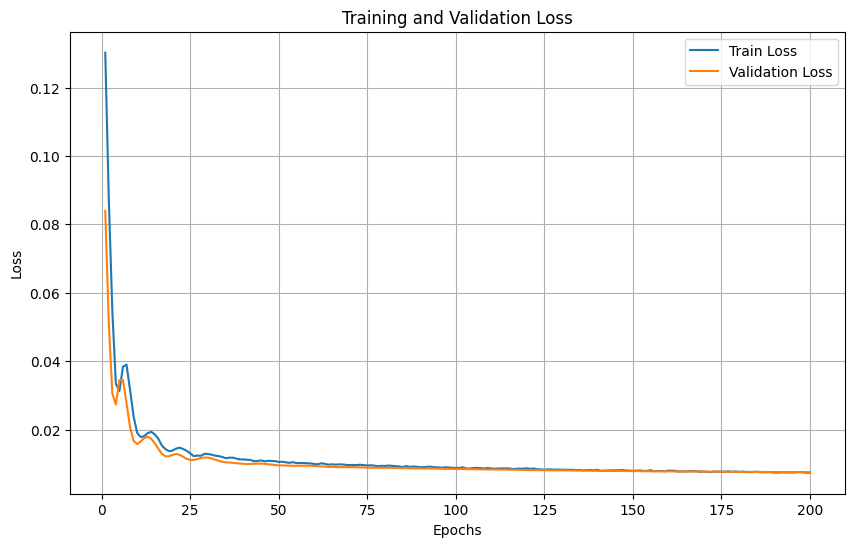

In [53]:
# Step 1: Load and Prepare Data
# Assume `final_combined_df` is already loaded as a DataFrame
# Handle missing values
final_combined_df = final_combined_df.dropna(subset=['SoilMoisture'])  # Drop rows where SoilMoisture is NaN
final_combined_df.fillna(final_combined_df.mean(), inplace=True)  # Fill other NaN values with column means

# Select features and target
X = final_combined_df.drop(columns=['date', 'SoilMoisture'])  # Drop 'date' and target
y = final_combined_df['SoilMoisture']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Step 2: Define Neural Network Model
class SoilMoistureNN(nn.Module):
    def __init__(self, input_size):
        super(SoilMoistureNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        return self.model(x)

# Step 3: Initialize Model, Loss, and Optimizer
input_size = X_train.shape[1]
model = SoilMoistureNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Step 4: Train the Model and Track Loss
epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    train_predictions = model(X_train_tensor)
    train_loss = criterion(train_predictions, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        val_predictions = model(X_val_tensor)
        val_loss = criterion(val_predictions, y_val_tensor)
        val_losses.append(val_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss.item()}, Val Loss: {val_loss.item()}")

# Save the trained model
torch.save(model.state_dict(), 'model.pth')
print("Model saved as 'model.pth'.")

# Step 5: Plot Train and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


FUNCTION DEFINITION FOR SOIL MOISTURE PREDICTION

In [ ]:
import os
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tabulate import tabulate  # For nicely formatted tables

#needed to build the df for the prediction
def get_forecast_weather_data(polygon_coordinates, forecast_days=3):
    """
    Fetch current, forecast, and historical weather data using OpenWeatherMap One Call API 3.0.

    Parameters:
    - polygon_coordinates: List of [longitude, latitude] pairs defining a polygon
    - forecast_days: Number of forecast days to include

    Returns:
    - pd.DataFrame: Combined current, forecast, and optional historical weather data
    """
    try:
        # Your OpenWeatherMap API key (embedded for convenience)
        api_key = "43d7716149175723f1c5277d441a8eb0"

        # Calculate the centroid of the polygon
        lon = np.mean([point[0] for point in polygon_coordinates])
        lat = np.mean([point[1] for point in polygon_coordinates])
        print(f"Centroid calculated: Latitude={lat}, Longitude={lon}")

        # Define the One Call API endpoint
        url = f"https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&units=metric&appid={api_key}"
        
        # Fetch weather data
        print(f"Fetching weather data from URL: {url}")
        response = requests.get(url)
        response.raise_for_status()
        weather_data = response.json()

        # Parse current weather
        current_data = weather_data.get("current", {})
        current_weather = {
            'date': datetime.utcfromtimestamp(current_data.get('dt', 0)),
            'temperature': current_data.get('temp', None),
            'precipitation': current_data.get('rain', {}).get('1h', 0.0),
            'irradiation': 100 - current_data.get('clouds', 0),  # Approximation: 100% - Cloud Cover
            'humidity': current_data.get('humidity', None),
            'wind_speed': current_data.get('wind_speed', None),
            'pressure': current_data.get('pressure', None)
        }

        # Parse forecast data
        daily_forecasts = weather_data.get("daily", [])
        forecast_list = []
        for day in daily_forecasts[:forecast_days]:
            forecast_list.append({
                'date': datetime.utcfromtimestamp(day['dt']),
                'temperature': day.get('temp', {}).get('day', None),
                'precipitation': day.get('rain', 0.0),
                'irradiation': 100 - day.get('clouds', 0),  # Approximation: 100% - Cloud Cover
                'humidity': day.get('humidity', None),
                'wind_speed': day.get('wind_speed', None),
                'pressure': day.get('pressure', None)
            })

        # Combine current weather with forecasts
        weather_data_combined = [current_weather] + forecast_list

        # Convert to DataFrame
        df = pd.DataFrame(weather_data_combined)

        # Add forecast columns
        for i in range(1, forecast_days + 1):
            df[f'temperature_t+{i}'] = df['temperature'].shift(-i)
            df[f'precipitation_t+{i}'] = df['precipitation'].shift(-i)
            df[f'irradiation_t+{i}'] = df['irradiation'].shift(-i)
            df[f'humidity_t+{i}'] = df['humidity'].shift(-i)
            df[f'wind_speed_t+{i}'] = df['wind_speed'].shift(-i)
            df[f'pressure_t+{i}'] = df['pressure'].shift(-i)

        # Drop rows with incomplete forecast data
        df.dropna(inplace=True)

        return df.reset_index(drop=True)

    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return pd.DataFrame(columns=[
            'date', 'temperature', 'precipitation', 'irradiation', 'humidity', 
            'wind_speed', 'pressure'
        ])
#needed for the prediction
def get_today_data(polygon_coordinates, soil_composition, days_before_today=20):
    # Fetch Sentinel-2 data for the last `days_before_today` days
    sentinel_data = get_sentinel2_indices(polygon_coordinates, days_before_today=days_before_today)
    # Fetch today's weather data
    weather_data = get_forecast_weather_data(polygon_coordinates, forecast_days=3)
    
    # Handle insufficient data
    if sentinel_data.empty or weather_data.empty:
        print("Insufficient data for today's predictions.")
        return pd.DataFrame()

    # Ensure numeric columns in Sentinel-2 data
    numeric_columns = ['NDVI', 'NDWI', 'GVMI']
    sentinel_data[numeric_columns] = sentinel_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Remove time from 'date' in both DataFrames
    sentinel_data['date'] = pd.to_datetime(sentinel_data['date']).dt.date
    weather_data['date'] = pd.to_datetime(weather_data['date']).dt.date

    # Get the last row of Sentinel-2 data and set today's date
    last_sentinel_row = sentinel_data.tail(1).copy()
    last_sentinel_row['date'] = datetime.now().date()  # Replace with today's date

    # Merge Sentinel-2 (updated for today) and weather data on 'date'
    today_data = pd.merge(weather_data, last_sentinel_row, on='date', how='left')

    # Add soil composition data
    for key, value in soil_composition.items():
        today_data[key] = value

    # Define the column order used in the neural network training dataset
    nn_column_order = [
        'date', 'SoilMoisture', 'NDVI', 'NDWI', 'GVMI', 'temperature',
        'precipitation', 'irradiation', 'humidity', 'wind_speed', 'pressure',
        'temperature_t+1', 'precipitation_t+1', 'irradiation_t+1',
        'humidity_t+1', 'wind_speed_t+1', 'pressure_t+1', 'temperature_t+2',
        'precipitation_t+2', 'irradiation_t+2', 'humidity_t+2',
        'wind_speed_t+2', 'pressure_t+2', 'temperature_t+3',
        'precipitation_t+3', 'irradiation_t+3', 'humidity_t+3',
        'wind_speed_t+3', 'pressure_t+3', 'clay fraction', 'organic carbon',
        'sand fraction', 'saturation', 'silt fraction'
    ]

    # Reorder columns to match the neural network training dataset (ignore missing 'SoilMoisture')
    today_data = today_data.reindex(columns=[col for col in nn_column_order if col in today_data.columns])

    return today_data

def predict_soil_moisture(polygon_coordinates, soil_composition, days_before_today=20, root_zone_depth=30, irrigation_efficiency=0.7):
    # Prepare today's data using `get_today_data`
    today_data = get_today_data(polygon_coordinates, soil_composition, days_before_today)

    # Handle insufficient data
    if today_data.empty:
        print("Insufficient data for predictions.")
        return pd.DataFrame()

    # Drop 'date' column and scale the data
    X = today_data.drop(columns=['date'])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

    # Define the neural network
    class SoilMoistureNN(torch.nn.Module):
        def __init__(self, input_size):
            super(SoilMoistureNN, self).__init__()
            self.model = torch.nn.Sequential(
                torch.nn.Linear(input_size, 256),
                torch.nn.ReLU(),
                torch.nn.Dropout(0.2),
                torch.nn.Linear(256, 128),
                torch.nn.ReLU(),
                torch.nn.Dropout(0.2),
                torch.nn.Linear(128, 64),
                torch.nn.Dropout(0.2),
                torch.nn.Linear(64, 32),
                torch.nn.ReLU(),
                torch.nn.Linear(32, 1)
            )
        
        def forward(self, x):
            return self.model(x)

    # Load the trained model
    if not os.path.exists('model.pth'):
        raise FileNotFoundError("The model file 'model.pth' was not found. Please provide a valid path.")
    input_size = X.shape[1]
    model = SoilMoistureNN(input_size)
    model.load_state_dict(torch.load('model.pth'))
    model.eval()

    # Predict soil moisture and add confidence level
    with torch.no_grad():
        predictions = model(X_tensor).numpy().flatten()
        confidence_level = [round(abs(1 - pred / 0.3) * 100, 2) for pred in predictions]  # Confidence as % similarity to field capacity

    # Define thresholds for irrigation
    field_capacity = soil_composition['saturation'] # the maximum saturation of the field equals field capacity
    FTSW_thresh = 0.6
    VWC_thresh = FTSW_thresh * field_capacity

    # Prepare results
    today_data['Predicted_SoilMoisture'] = predictions
    today_data['Confidence (%)'] = confidence_level

    # Calculate depth of water required (in cm) for rows where irrigation is needed
    today_data['Irrigate'] = today_data['Predicted_SoilMoisture'] < VWC_thresh
    today_data['WaterDepth_cm'] = (
        (field_capacity - today_data['Predicted_SoilMoisture']) / 100 * root_zone_depth / irrigation_efficiency
    )
    today_data['WaterDepth_mm'] = today_data['WaterDepth_cm'] * 10  # Convert cm to mm

    # Add irrigation suggestion with water depth
    today_data['Suggest'] = today_data.apply(
        lambda row: f"Irrigate {row['WaterDepth_mm']:.1f} mm" if row['Irrigate'] else "No Action",
        axis=1
    )

    # Prepare final output for display
    output = today_data[['date', 'Predicted_SoilMoisture', 'Confidence (%)', 'Suggest']]

    # Print the results as a formatted table
    print(tabulate(output, headers='keys', tablefmt='grid'))

    return output


ACTUAL PREDICTION

In [58]:
pontelongo_coordinates = [
    [45.251061, 12.021280],
    [45.250949, 12.021719],
    [45.251746, 12.022229],
    [45.251549, 12.022891],
    [45.252315, 12.023380],
    [45.252183, 12.023846],
    [45.252617, 12.024085],
    [45.252718, 12.022100],
    [45.251061, 12.021280]  # Closing the polygon by repeating the first point
]

pontelongo_soil_composition = {
    'clay fraction': 25,
    'sand fraction': 35,
    'organic carbon': 1.5,
    'saturation': 0.4,
    'silt fraction': 35
}

prediction_results = predict_soil_moisture(pontelongo_coordinates, pontelongo_soil_composition)
print(prediction_results)

Centroid calculated: Latitude=12.022534444444446, Longitude=45.25179988888888
Fetching weather data from URL: https://api.openweathermap.org/data/3.0/onecall?lat=12.022534444444446&lon=45.25179988888888&units=metric&appid=43d7716149175723f1c5277d441a8eb0
+----+------------+--------------------------+------------------+-----------------+
|    | date       |   Predicted_SoilMoisture |   Confidence (%) | Suggest         |
+====+============+==========================+==================+=================+
|  0 | 2024-11-20 |                 0.116032 |            61.32 | Irrigate 0.8 mm |
+----+------------+--------------------------+------------------+-----------------+
         date  Predicted_SoilMoisture  Confidence (%)          Suggest
0  2024-11-20                0.116032           61.32  Irrigate 0.8 mm


C:\Users\serafino\AppData\Local\Temp\ipykernel_13488\2041311686.py:180: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth'))


In [ ]:
import ee
import geemap


def get_region_from_coordinates(lat, lon):
    """
    Fetch the region for given coordinates using Google Earth Engine.

    Args:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.

    Returns:
        str: State name or error message.
    """
    try:
        # Point geometry for the coordinates
        point = ee.Geometry.Point([lon, lat])

        # Use a dataset with administrative boundaries (GADM in this case)
        admin_data = ee.FeatureCollection("FAO/GAUL/2015/level1")

        # Perform spatial filtering to get the feature containing the point
        filtered = admin_data.filterBounds(point)
        feature = filtered.first()

        # Extract the state name from the 'ADM1_NAME' property
        state_name = feature.get("ADM1_NAME").getInfo()
        return state_name
    except Exception as e:
        return f"Error: {e}"

# Example usage
if __name__ == "__main__":
    latitude = 45.251062
    longitude = 12.021280
    
    state = get_state_from_coordinates(latitude, longitude)
    print(f"The region for coordinates ({latitude}, {longitude}) is: {state}")


The state for coordinates (45.251061, 12.02128) is: Veneto
